# **Setup**

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

# **Load Dataset**

* https://www.cs.toronto.edu/~kriz/cifar.html

In [77]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar100.load_data()

In [78]:
print('Train Date: ',x_train.shape,y_train.shape)
print('Test Date: ',x_test.shape,y_test.shape)

Train Date:  (50000, 32, 32, 3) (50000, 1)
Test Date:  (10000, 32, 32, 3) (10000, 1)


## **Reshape Labels**

In [9]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [79]:
num_class = 100

y_train = keras.utils.to_categorical(y_train, num_class)
print(y_train[:5])

# y_test = keras.utils.to_categorical(y_test, num_class)
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## **Category Labels**

In [11]:
category_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(category_names)

category_names_dict = dict(zip(range(len(category_names)),category_names))
print(category_names_dict)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [12]:
category_names_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# **Data Exploration**

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


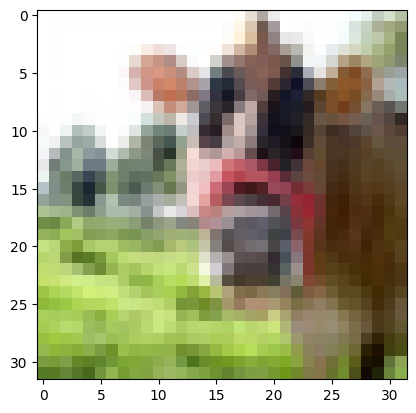

In [19]:
print(y_train[0])
print(x_train[0])
plt.imshow(x_train[0])
plt.show()

# **Data Model**

In [99]:
from keras.layers import Input, Dense, Flatten, Rescaling, Conv2D, MaxPooling2D, \
                        Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, \
                        RandomContrast, RandomCrop , RandomBrightness, RandomTranslation
from keras_cv.layers import RandomShear, RandomHue, RandomSaturation,RandomCutout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard

## **Model 01 - ANN**

In [21]:
x_train.shape

(50000, 32, 32, 3)

In [22]:
y_train.shape

(50000, 100)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
# Creat Model
Model = Sequential()
Model.add(Rescaling(1./255, input_shape=(32,32,3)))
Model.add(Flatten())
Model.add(Dense(units=512, activation='relu'))
Model.add(Dense(units=256, activation='relu'))
Model.add(Dense(units=128, activation='relu'))
Model.add(Dense(units=64, activation='relu'))

Model.add(Dense(units=100, activation='sigmoid'))
# Model.summary()

Model01_ES = EarlyStopping(monitor='accuracy', patience=10, verbose=1, mode='auto',restore_best_weights=True)
Model01_CP = ModelCheckpoint('model01_ANN.keras', save_best_only=True, verbose=1)

# Compile Model
Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train Model
Model.fit(x_train, y_train, epochs=100, batch_size=32,shuffle=True,validation_split=0.2,
          callbacks=[Model01_ES,Model01_CP],validation_freq=3)

# Predict Test Data
y_pred = Model.predict(x_test)

# Model Evaluation
Model.evaluate(x_test, y_test) # Loss & Metrics

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0269 - loss: 4.4311
Epoch 2/100
  28/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0848 - loss: 4.0305

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0819 - loss: 3.9704
Epoch 3/100
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1140 - loss: 3.7858
Epoch 3: val_loss improved from inf to 3.74122, saving model to model01_ANN.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1141 - loss: 3.7856 - val_accuracy: 0.1333 - val_loss: 3.7412
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1378 - loss: 3.6444
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1558 - loss: 3.5560
Epoch 6/100
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1668 - loss: 3.4735
Epoch 6: val_loss improved from 3.74122 to 3.52197, saving model to model01_ANN.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1668 - loss: 3.4735 - val_accuracy: 0.1607 - val_loss: 3.5220
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1770 - loss: 3.4163
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.191

[4.619959831237793, 0.18639999628067017]

### **Visualize Model**

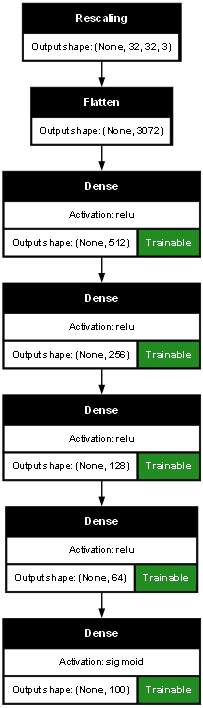

In [44]:
from IPython.display import Image

# keras.utils.plot_model(Model,to_file='Model_Architecture.png',show_shapes=True)
# Image('Model_Architecture.png')

keras.utils.plot_model(Model, show_shapes=True,show_layer_activations=True,show_trainable=True,dpi=50)

### **Visualize Predictions**

In [54]:
y_pred[:5]

array([[1.56834076e-07, 1.18945609e-05, 9.80269164e-03, 8.77716672e-03,
        4.43099911e-04, 3.91832378e-04, 1.13739101e-04, 2.82495894e-05,
        5.70426658e-02, 3.36284196e-04, 3.95590992e-04, 1.13303715e-04,
        3.43517035e-01, 5.59242852e-02, 5.63618869e-06, 1.18574612e-02,
        2.51811650e-03, 1.12241611e-01, 2.95447499e-05, 1.28644370e-02,
        1.43101241e-03, 7.40584393e-04, 6.22873148e-03, 1.58530213e-02,
        2.27342919e-03, 2.67711747e-02, 1.15985924e-03, 2.70723202e-03,
        4.00840327e-06, 1.11187308e-03, 7.26031326e-03, 7.55043840e-03,
        2.62790220e-03, 3.11882538e-03, 1.04766717e-04, 1.65955556e-04,
        1.32663372e-05, 4.69306819e-02, 4.05106228e-03, 2.66085714e-02,
        6.33255113e-03, 7.63066520e-04, 1.11467534e-05, 2.09764562e-06,
        5.94949925e-05, 1.21915108e-03, 1.83866955e-02, 1.54643634e-03,
        9.85193998e-03, 4.61578339e-01, 1.02318309e-05, 1.35888641e-07,
        1.31975417e-03, 4.72988787e-23, 1.75242858e-05, 9.704319

In [64]:
y_pred_labels = [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

[49, 42, 15, 46, 54]

In [69]:
y_test[:5]

array([[49],
       [33],
       [72],
       [51],
       [71]])

In [70]:
tf.math.confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[40,  2,  0, ...,  0,  2,  0],
       [ 3, 31,  1, ...,  1,  0,  0],
       [ 1,  1,  9, ...,  4,  2,  0],
       ...,
       [ 0,  1,  0, ..., 16,  0,  0],
       [ 1,  0,  1, ...,  2,  3,  0],
       [ 0,  1,  0, ...,  1,  0, 21]])>

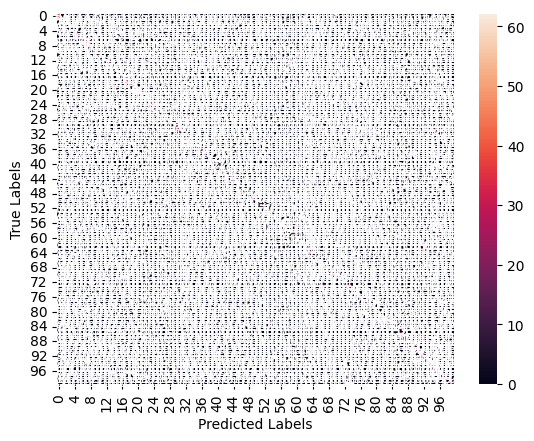

In [71]:
sns.heatmap(tf.math.confusion_matrix(y_test, y_pred_labels),annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Performance Evaluation**

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

print('Classification Report: ',classification_report(y_test,y_pred_labels))

Classification Report:                precision    recall  f1-score   support

           0       0.36      0.40      0.38       100
           1       0.25      0.31      0.27       100
           2       0.11      0.09      0.10       100
           3       0.06      0.05      0.06       100
           4       0.05      0.07      0.06       100
           5       0.15      0.18      0.16       100
           6       0.10      0.08      0.09       100
           7       0.23      0.30      0.26       100
           8       0.20      0.26      0.23       100
           9       0.32      0.23      0.27       100
          10       0.05      0.08      0.06       100
          11       0.09      0.05      0.06       100
          12       0.25      0.14      0.18       100
          13       0.08      0.11      0.10       100
          14       0.09      0.10      0.09       100
          15       0.09      0.09      0.09       100
          16       0.14      0.24      0.18       100
   

## **Model 02 - CNN**

In [80]:
x_train.shape

(50000, 32, 32, 3)

In [81]:
y_train.shape

(50000, 100)

In [85]:
y_train_01 = y_train.reshape(-1,)
y_train_01.shape

(5000000,)

In [105]:
# Creat Model02

Model02 = Sequential()
Model02.add(Rescaling(1./255, input_shape=(32,32,3)))

# Image Augmentation
Model02.add(RandomRotation(0.2))
Model02.add(RandomZoom(0.2))
Model02.add(RandomFlip())
# Model02.add(RandomContrast(0.2))
# Model02.add(RandomBrightness(0.2))
# Model02.add(RandomTranslation(0.2,0.2))
# Model02.add(RandomShear(0.2))
# Model02.add(RandomCrop(32,32))
# Model02.add(RandomHue(factor=0.2,value_range=0.2))

Model02.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'))
Model02.add(Conv2D(filters=256, kernel_size=(3,3),padding='same',activation='relu'))
Model02.add(MaxPooling2D(pool_size=(2,2)))
Model02.add(BatchNormalization())
Model02.add(Dropout(0.25))

Model02.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
Model02.add(Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
Model02.add(MaxPooling2D(pool_size=(2,2)))
Model02.add(BatchNormalization())
Model02.add(Dropout(0.25))


Model02.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
Model02.add(MaxPooling2D(pool_size=(2,2)))
Model02.add(BatchNormalization())
Model02.add(Dropout(0.25))

Model02.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',activation='relu'))
Model02.add(MaxPooling2D(pool_size=(2,2)))

Model02.add(Flatten())
Model02.add(Dense(units=200, activation='relu'))
Model02.add(Dense(units=150, activation='relu'))
Model02.add(Dense(units=100, activation='softmax')) # Use softmax instead of sigmoid
# Model02.summary()

# Callbacks
Model01_ES = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto',restore_best_weights=True)
Model01_CP = ModelCheckpoint('model02_CNN.keras', save_best_only=True, verbose=1)

# Compile Model02
Model02.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train Model02
Model02.fit(x_train, y_train, epochs=20,batch_size=32,shuffle=True,validation_split=0.2,
             callbacks=[Model01_ES,Model01_CP],validation_freq=3)

# Predict Test Data
y_pred = Model02.predict(x_test)

# Model02 Evaluation
Model02.evaluate(x_test, y_test) # Loss & Metrics

Epoch 1/20
 361/1250 ━━━━━━━━━━━━━━━━━━━━ 5:14 353ms/step - accuracy: 0.0290 - loss: 4.5202

KeyboardInterrupt: 

### **Visualize Predictions**

In [ ]:
y_pred[:5]

NameError: name 'y_pred' is not defined

In [ ]:
y_pred_labels = [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

NameError: name 'y_pred' is not defined

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
tf.math.confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[720,  13,  33,  28,  16,   7,  17,   7,  89,  70],
       [ 11, 772,   5,  10,   4,   6,  11,   2,  26, 153],
       [ 69,   7, 493,  96, 112,  71,  82,  31,  24,  15],
       [ 25,   7,  44, 566,  59, 132,  75,  35,  24,  33],
       [ 33,   1,  54,  78, 673,  26,  43,  67,  15,  10],
       [ 15,   4,  37, 218,  50, 580,  30,  40,   6,  20],
       [  8,   3,  26,  78,  51,  14, 791,   5,   7,  17],
       [ 18,   5,  20,  61,  65,  63,   5, 714,   7,  42],
       [ 52,  27,   6,  14,   3,   8,  12,   5, 831,  42],
       [ 25,  43,   7,  14,   4,   2,  12,   4,  32, 857]])>

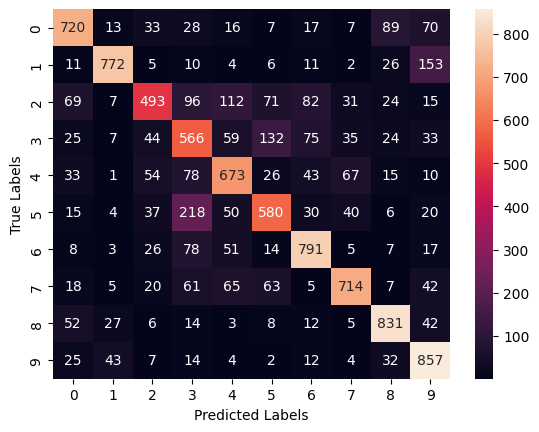

In [ ]:
sns.heatmap(tf.math.confusion_matrix(y_test, y_pred_labels),annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Performance Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print('Classification Report: ',classification_report(y_test,y_pred_labels))

Classification Report:                precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.88      0.77      0.82      1000
           2       0.68      0.49      0.57      1000
           3       0.49      0.57      0.52      1000
           4       0.65      0.67      0.66      1000
           5       0.64      0.58      0.61      1000
           6       0.73      0.79      0.76      1000
           7       0.78      0.71      0.75      1000
           8       0.78      0.83      0.81      1000
           9       0.68      0.86      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



# **Reference**

* https://www.youtube.com/watch?v=iGOqVRf3DKo&t=688s
* https://github.com/dwaipayan-nandi/cifar100